In [38]:
#test for oralens llc, using parkinsons data
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [39]:
#reading the dataset
parkinsonsds = pd.read_csv('/content/parkinsons.csv')

In [40]:

# Display basic information about the dataset
print("Dataset Overview:")
print(parkinsonsds.info())

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(parkinsonsds.describe())

# Count of missing values in each column
print("\nMissing Values:")
print(parkinsonsds.isnull().sum())

# Count of unique values in each column
print("\nUnique Values:")
print(parkinsonsds.nunique())

# Correlation matrix
print("\nCorrelation Matrix:")
print(parkinsonsds.corr())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-

<ipython-input-40-d2f654178705>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(parkinsonsds.corr())


In [41]:
# Count of missing values in each column
null_values_count = parkinsonsds.isnull().sum()

# Display the number of null values for each column
print("Number of Null Values in Each Column:")
print(null_values_count)


Number of Null Values in Each Column:
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [42]:
#dropping name column from database
parkinsonsds = parkinsonsds.drop('name', axis=1)

# Display the updated DataFrame
print(parkinsonsds.head())



   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0

In [43]:
#couting status to solve class imbalance
status_counts = parkinsonsds['status'].value_counts()

# Display the counts
print("Count of 0 and 1 in 'status' variable:")
print(status_counts)


Count of 0 and 1 in 'status' variable:
1    147
0     48
Name: status, dtype: int64


In [44]:
#implementing SMOTE to oversample the minority class
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Separate features (X) and target variable (y)
X = parkinsonsds.drop('status', axis=1)
y = parkinsonsds['status']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Display the shape of the original and balanced datasets
print("Original Dataset Shape:", X.shape, y.shape)
print("Balanced Dataset Shape:", X_smote.shape, y)


Original Dataset Shape: (195, 22) (195,)
Balanced Dataset Shape: (294, 22) 0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [45]:

status_counts = parkinsonsds['status'].value_counts()

# Display the counts
print("Count of 0 and 1 in 'status' variable:")
print(status_counts)

Count of 0 and 1 in 'status' variable:
1    147
0     48
Name: status, dtype: int64


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'parkinsonsds.csv' is the name of your dataset file
file_path = 'path/to/parkinsonsds.csv'


# Separate features (X) and target variable (y)
X = parkinsonsds.drop('status', axis=1)  # Assuming 'status' is the target variable
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.9487179487179487

Confusion Matrix:
[[ 5  2]
 [ 0 32]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



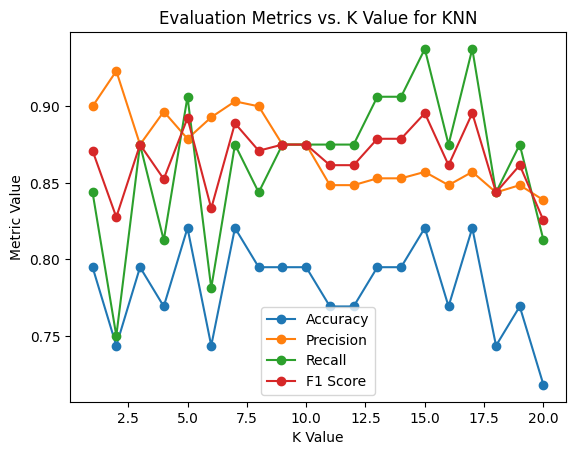

Best k value based on Accuracy: 5
Best k value based on F1 Score: 15


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different values of k (1 to 20)
k_values = list(range(1, 21))
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = knn_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = knn_model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Find the best k value based on accuracy
best_k_acc = k_values[accuracy_scores.index(max(accuracy_scores))]

# Find the best k value based on F1-score
best_k_f1 = k_values[f1_scores.index(max(f1_scores))]

# Plot the metrics for different k values
plt.plot(k_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(k_values, precision_scores, label='Precision', marker='o')
plt.plot(k_values, recall_scores, label='Recall', marker='o')
plt.plot(k_values, f1_scores, label='F1 Score', marker='o')
plt.title('Evaluation Metrics vs. K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

print("Best k value based on Accuracy:", best_k_acc)
print("Best k value based on F1 Score:", best_k_f1)


In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split



# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply KNN with k = 15
knn_model_15 = KNeighborsClassifier(n_neighbors=15)
knn_model_15.fit(X_train, y_train)
y_pred_15 = knn_model_15.predict(X_test)

# Calculate evaluation metrics for k = 15
accuracy_15 = accuracy_score(y_test, y_pred_15)
precision_15 = precision_score(y_test, y_pred_15)
recall_15 = recall_score(y_test, y_pred_15)
f1_15 = f1_score(y_test, y_pred_15)

# Display the metrics for k = 15
print("Metrics for k = 15:")
print("Accuracy:", accuracy_15)
print("Precision:", precision_15)
print("Recall:", recall_15)
print("F1 Score:", f1_15)


Metrics for k = 15:
Accuracy: 0.8205128205128205
Precision: 0.8571428571428571
Recall: 0.9375
F1 Score: 0.8955223880597014


In [49]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming parkinsons_preprocessed is your preprocessed dataset

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Display the metrics for Decision Tree
print("Metrics for Decision Tree:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)


Metrics for Decision Tree:
Accuracy: 0.9230769230769231
Precision: 0.9393939393939394
Recall: 0.96875
F1 Score: 0.9538461538461539


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming parkinsons_preprocessed is your preprocessed dataset

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Display the metrics for Random Forest
print("Metrics for Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Metrics for Random Forest:
Accuracy: 0.9487179487179487
Precision: 0.9411764705882353
Recall: 1.0
F1 Score: 0.9696969696969697


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split



# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SVM classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Display the metrics for SVM
print("Metrics for SVM:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)


Metrics for SVM:
Accuracy: 0.8461538461538461
Precision: 0.8611111111111112
Recall: 0.96875
F1 Score: 0.911764705882353


In [52]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Display the metrics for Logistic Regression
print("Metrics for Logistic Regression:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)


Metrics for Logistic Regression:
Accuracy: 0.8974358974358975
Precision: 0.8888888888888888
Recall: 1.0
F1 Score: 0.9411764705882353


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Bagging with k-Nearest Neighbors
knn_model = KNeighborsClassifier()
bagging_knn_model = BaggingClassifier(base_estimator=knn_model, random_state=42)
bagging_knn_model.fit(X_train, y_train)
y_pred_bagging_knn = bagging_knn_model.predict(X_test)

# Calculate evaluation metrics for Bagging with k-Nearest Neighbors
accuracy_bagging_knn = accuracy_score(y_test, y_pred_bagging_knn)
precision_bagging_knn = precision_score(y_test, y_pred_bagging_knn)
recall_bagging_knn = recall_score(y_test, y_pred_bagging_knn)
f1_bagging_knn = f1_score(y_test, y_pred_bagging_knn)

# Display the metrics for Bagging with k-Nearest Neighbors
print("Metrics for Bagging with k-Nearest Neighbors:")
print("Accuracy:", accuracy_bagging_knn)
print("Precision:", precision_bagging_knn)
print("Recall:", recall_bagging_knn)
print("F1 Score:", f1_bagging_knn)



Metrics for Bagging with k-Nearest Neighbors:
Accuracy: 0.8205128205128205
Precision: 0.8787878787878788
Recall: 0.90625
F1 Score: 0.8923076923076922


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Bagging with Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
bagging_dt_model = BaggingClassifier(base_estimator=dt_model, random_state=42)
bagging_dt_model.fit(X_train, y_train)
y_pred_bagging_dt = bagging_dt_model.predict(X_test)

# Calculate evaluation metrics for Bagging with Decision Trees
accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)
precision_bagging_dt = precision_score(y_test, y_pred_bagging_dt)
recall_bagging_dt = recall_score(y_test, y_pred_bagging_dt)
f1_bagging_dt = f1_score(y_test, y_pred_bagging_dt)

# Display the metrics for Bagging with Decision Trees
print("Metrics for Bagging with Decision Trees:")
print("Accuracy:", accuracy_bagging_dt)
print("Precision:", precision_bagging_dt)
print("Recall:", recall_bagging_dt)
print("F1 Score:", f1_bagging_dt)


Metrics for Bagging with Decision Trees:
Accuracy: 0.8974358974358975
Precision: 0.9375
Recall: 0.9375
F1 Score: 0.9375


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn = [1 if pred > 0.5 else 0 for pred in y_pred_nn]

# Calculate evaluation metrics for the neural network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

# Display the metrics for the neural network
print("Metrics for Neural Network:")
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1 Score:", f1_nn)


Epoch 1/10
4/4 [==============================] - 2s 125ms/step - loss: 0.7280 - accuracy: 0.4194 - val_loss: 0.6541 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 0s 25ms/step - loss: 0.6288 - accuracy: 0.6290 - val_loss: 0.5764 - val_accuracy: 0.6562
Epoch 3/10
4/4 [==============================] - 0s 24ms/step - loss: 0.5539 - accuracy: 0.7661 - val_loss: 0.5247 - val_accuracy: 0.7188
Epoch 4/10
4/4 [==============================] - 0s 26ms/step - loss: 0.4985 - accuracy: 0.8145 - val_loss: 0.4862 - val_accuracy: 0.7812
Epoch 5/10
4/4 [==============================] - 0s 27ms/step - loss: 0.4571 - accuracy: 0.8548 - val_loss: 0.4575 - val_accuracy: 0.7812
Epoch 6/10
4/4 [==============================] - 0s 20ms/step - loss: 0.4228 - accuracy: 0.8548 - val_loss: 0.4344 - val_accuracy: 0.8125
Epoch 7/10
4/4 [==============================] - 0s 25ms/step - loss: 0.3954 - accuracy: 0.8790 - val_loss: 0.4169 - val_accuracy: 0.8125
Epoch 8/10
4/4 [==========

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model with different activation functions
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='tanh'))  # Change activation function to tanh
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn = [1 if pred > 0.5 else 0 for pred in y_pred_nn]

# Calculate evaluation metrics for the neural network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

# Display the metrics for the neural network
print("Metrics for Neural Network with tanh activation:")
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1 Score:", f1_nn)


Epoch 1/10
4/4 [==============================] - 1s 70ms/step - loss: 0.8065 - accuracy: 0.4597 - val_loss: 0.8461 - val_accuracy: 0.4062
Epoch 2/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6587 - accuracy: 0.6290 - val_loss: 0.6695 - val_accuracy: 0.5938
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 0.5474 - accuracy: 0.7500 - val_loss: 0.5577 - val_accuracy: 0.6562
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 0.4710 - accuracy: 0.7823 - val_loss: 0.4920 - val_accuracy: 0.7188
Epoch 5/10
4/4 [==============================] - 0s 21ms/step - loss: 0.4249 - accuracy: 0.7984 - val_loss: 0.4543 - val_accuracy: 0.7188
Epoch 6/10
4/4 [==============================] - 0s 14ms/step - loss: 0.3910 - accuracy: 0.8306 - val_loss: 0.4298 - val_accuracy: 0.7188
Epoch 7/10
4/4 [==============================] - 0s 14ms/step - loss: 0.3687 - accuracy: 0.8548 - val_loss: 0.4135 - val_accuracy: 0.7500
Epoch 8/10
4/4 [===========

In [57]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Perceptron
perceptron_model = Perceptron(random_state=42)

# Perform cross-validation
y_pred_perceptron_cv = cross_val_predict(perceptron_model, X_scaled, y, cv=5)

# Calculate evaluation metrics for the Perceptron
accuracy_perceptron = accuracy_score(y, y_pred_perceptron_cv)
precision_perceptron = precision_score(y, y_pred_perceptron_cv)
recall_perceptron = recall_score(y, y_pred_perceptron_cv)
f1_perceptron = f1_score(y, y_pred_perceptron_cv)

# Display the metrics for the Perceptron
print("Metrics for Perceptron with cross-validation:")
print("Accuracy:", accuracy_perceptron)
print("Precision:", precision_perceptron)
print("Recall:", recall_perceptron)
print("F1 Score:", f1_perceptron)


Metrics for Perceptron with cross-validation:
Accuracy: 0.7076923076923077
Precision: 0.7960526315789473
Recall: 0.8231292517006803
F1 Score: 0.8093645484949833


In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform cross-validation
y_pred_nb_cv = cross_val_predict(nb_model, X_scaled, y, cv=5)

# Calculate evaluation metrics for Naive Bayes
accuracy_nb = accuracy_score(y, y_pred_nb_cv)
precision_nb = precision_score(y, y_pred_nb_cv)
recall_nb = recall_score(y, y_pred_nb_cv)
f1_nb = f1_score(y, y_pred_nb_cv)

# Display the metrics for Naive Bayes
print("Metrics for Naive Bayes with cross-validation:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)


Metrics for Naive Bayes with cross-validation:
Accuracy: 0.6820512820512821
Precision: 0.912621359223301
Recall: 0.6394557823129252
F1 Score: 0.7520000000000001


In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import numpy as np

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform cross-validation
y_pred_nb_cv = cross_val_predict(nb_model, X_scaled, y, cv=5)

# Calculate evaluation metrics for Naive Bayes
accuracy_nb = accuracy_score(y, y_pred_nb_cv)
precision_nb = precision_score(y, y_pred_nb_cv)
recall_nb = recall_score(y, y_pred_nb_cv)
f1_nb = f1_score(y, y_pred_nb_cv)

# Display the metrics for Naive Bayes
print("Metrics for Naive Bayes with cross-validation:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)


Metrics for Naive Bayes with cross-validation:
Accuracy: 0.6820512820512821
Precision: 0.912621359223301
Recall: 0.6394557823129252
F1 Score: 0.7520000000000001


In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter based on your requirements

# Fit the model to the training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the evaluation metrics for Ridge Regression
print("Evaluation metrics for Ridge Regression:")
print("Mean Squared Error:", mse_ridge)
print("R^2 Score:", r2_ridge)


Evaluation metrics for Ridge Regression:
Mean Squared Error: 0.0986603225272626
R^2 Score: 0.3300787921251498


In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate evaluation metrics for XGBoost Classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Display the metrics for XGBoost Classifier
print("Metrics for XGBoost Classifier:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 Score:", f1_xgb)


Metrics for XGBoost Classifier:
Accuracy: 0.9487179487179487
Precision: 0.9411764705882353
Recall: 1.0
F1 Score: 0.9696969696969697


In [62]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the LightGBM Classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Fit the model to the training data
lgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Calculate evaluation metrics for LightGBM Classifier
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

# Display the metrics for LightGBM Classifier
print("Metrics for LightGBM Classifier:")
print("Accuracy:", accuracy_lgb)
print("Precision:", precision_lgb)
print("Recall:", recall_lgb)
print("F1 Score:", f1_lgb)


[LightGBM] [Info] Number of positive: 115, number of negative: 41
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1128
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.737179 -> initscore=1.031360
[LightGBM] [Info] Start training from score 1.031360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lda = lda_model.predict(X_test_scaled)

# Calculate evaluation metrics for LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda)

# Display the metrics for LDA
print("Metrics for Linear Discriminant Analysis (LDA):")
print("Accuracy:", accuracy_lda)
print("Precision:", precision_lda)
print("Recall:", recall_lda)
print("F1 Score:", f1_lda)


Metrics for Linear Discriminant Analysis (LDA):
Accuracy: 0.8717948717948718
Precision: 0.9090909090909091
Recall: 0.9375
F1 Score: 0.923076923076923


In [64]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = parkinsonsds.drop(columns=['status'])
y = parkinsonsds['status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the QDA model
qda_model = QuadraticDiscriminantAnalysis()

# Fit the model to the training data
qda_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_qda = qda_model.predict(X_test_scaled)

# Calculate evaluation metrics for QDA
accuracy_qda = accuracy_score(y_test, y_pred_qda)
precision_qda = precision_score(y_test, y_pred_qda)
recall_qda = recall_score(y_test, y_pred_qda)
f1_qda = f1_score(y_test, y_pred_qda)

# Display the metrics for QDA
print("Metrics for Quadratic Discriminant Analysis (QDA):")
print("Accuracy:", accuracy_qda)
print("Precision:", precision_qda)
print("Recall:", recall_qda)
print("F1 Score:", f1_qda)


Metrics for Quadratic Discriminant Analysis (QDA):
Accuracy: 0.8974358974358975
Precision: 0.8888888888888888
Recall: 1.0
F1 Score: 0.9411764705882353
